chi_squared 41811.79768542097
R2 0.7390635826681637


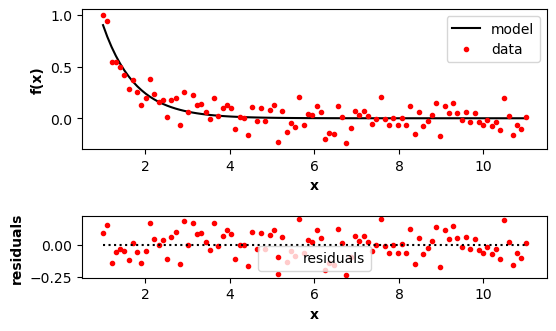

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def decay_model(x, N0, lam):
    return N0*np.exp(-lam*x)

n_points = 100
x = np.linspace(1, 11, n_points)

mean = 0
variance = 0.01
std = np.sqrt(variance)

eps = np.random.randn(n_points)*std + mean
# 2nd method
# eps = np.random.normal(loc=mean, scale=std, size=n_points)

# y = 1/x**2 + eps/3 # devide with a number to reduce noice
y = 1/x**2 + eps

# use curve_fit
popt, pcov = curve_fit(decay_model, x, y)

fig, ax = plt.subplots(nrows = 2, figsize = (6,4))

ax[0].plot(x, decay_model(x, *popt), 'k', label = 'model')
ax[0].plot(x, y, 'r.', label = 'data')
ax[0].set_xlabel('x', weight = 'bold')
ax[0].set_ylabel('f(x)', weight = 'bold')
ax[0].legend()

residuals = y - decay_model(x, *popt)
chi_squared = sum(residuals**2 / decay_model(x, *popt))
r_squared = 1 - (sum(residuals**2) / sum((y - np.mean(y))**2))

plt.gca().set_aspect(3)
ax[1].plot(x, residuals, 'r.', label = 'residuals')
ax[1].plot(x, np.zeros(len(x)), 'k:')
ax[1].set_xlabel('x', weight = 'bold')
ax[1].set_ylabel('residuals', weight = 'bold')
ax[1].legend()

# plt.xticks(weight = 'bold')
# plt.yticks(weight = 'bold')

print('chi_squared', chi_squared)
print('R2', r_squared)